# Lab: First Foray

```yaml
Course:   DS 5001 Exploratory Text Analytics
Module:   01 Getting Started
Topic:    Lab: First Foray
Author:   R.C. Alvarado
Date:     14 October 2022 (revised)
```

## Purpose

We take a raw text file from Project Gutenberg and convert it into a dataframe of tokens. We then explore some properties of the data. The main idea is to get acquainted with the primary process of convert text into analytical form.

## Set Up

In [10]:
import pandas as pd

In [3]:
import configparser
config = configparser.ConfigParser()

In [4]:
config.read("../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

## Import File

In [5]:
lines = open(f"{data_home}/gutenberg/pg105.txt", 'r').readlines()

In [6]:
lines[:5]

['\ufeffThe Project Gutenberg EBook of Persuasion, by Jane Austen\n',
 '\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n']

In [7]:
lines[-5:]

['\n',
 'This Web site includes information about Project Gutenberg-tm,\n',
 'including how to make donations to the Project Gutenberg Literary\n',
 'Archive Foundation, how to help produce our new eBooks, and how to\n',
 'subscribe to our email newsletter to hear about new eBooks.\n']

## Convert to Dataframe

In [11]:
text = pd.DataFrame(lines)

In [12]:
text.sample(10)

,0
8702,any statements concerning tax treatment of don...
5384,\n
4874,\n
3713,"Harville was a very experienced nurse, and her..."
8131,could have conceived. All the surprise and su...
1981,"thoughts, when he more seriously described the..."
7001,she heard that he was coming again in the even...
3104,"the pleasant little bay, which, in the season,..."
1521,lived some years longer in the world than her ...
5598,"possibly be; and, after a little hesitation, s..."


In [13]:
text.columns = ['line_str']

In [14]:
text.head()

,line_str
0,"﻿The Project Gutenberg EBook of Persuasion, by..."
1,\n
2,This eBook is for the use of anyone anywhere a...
3,almost no restrictions whatsoever. You may co...
4,re-use it under the terms of the Project Guten...


In [15]:
text.index.name = 'line_num'

In [16]:
text.head()

,line_str
line_num,
0,"﻿The Project Gutenberg EBook of Persuasion, by..."
1,\n
2,This eBook is for the use of anyone anywhere a...
3,almost no restrictions whatsoever. You may co...
4,re-use it under the terms of the Project Guten...


## Extract Simple Features

In [17]:
text['len'] = text.line_str.str.len()

In [18]:
text.len.describe()

count    8734.000000
mean       55.673575
std        25.340390
min         1.000000
25%        61.000000
50%        68.000000
75%        71.000000
max        74.000000
Name: len, dtype: float64

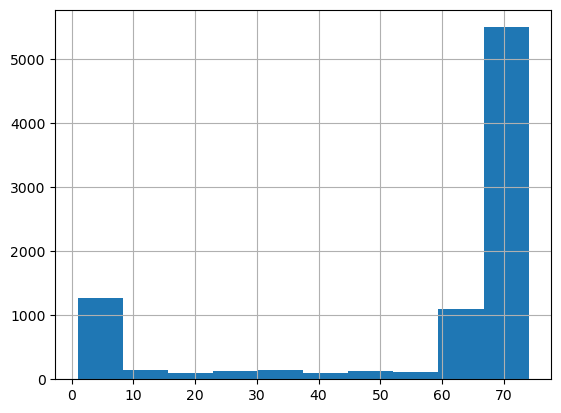

In [19]:
text.len.hist();

**Why two humps?** What might this bimodal distribution indicate?

Let's look at the first hump for characters.

In [20]:
text[text['len'] < 5].sample(10)

,line_str,len
line_num,,
4333,\n,1
3172,\n,1
6317,\n,1
8241,\n,1
5899,\n,1
3045,\n,1
8159,\n,1
8420,\n,1
7374,\n,1


## Import Again

Now that we know what line breaks mean, we can use this information to import the file with a more accurate structure. Note also that we could have inferred this from visual inspection, too. But the principle that statistical features can provide evidence for structure remains -- we will use this throughout the course.

### Interpret line breaks `\n\n`

In [21]:
chunk_pat = '\n\n'

In [22]:
chunks = open('pg105.txt', 'r').read().split(chunk_pat)

In [23]:
chunks[:5]

['Persuasion by Jane Austen (1818)',
 '',
 'Chapter 1',
 'Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,\nfor his own amusement, never took up any book but the Baronetage; there\nhe found occupation for an idle hour, and consolation in a distressed\none; there his faculties were roused into admiration and respect, by\ncontemplating the limited remnant of the earliest patents; there any\nunwelcome sensations, arising from domestic affairs changed naturally\ninto pity and contempt as he turned over the almost endless creations\nof the last century; and there, if every other leaf were powerless, he\ncould read his own history with an interest which never failed.  This\nwas the page at which the favourite volume always opened:',
 '           "ELLIOT OF KELLYNCH HALL.']

In [24]:
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'

In [25]:
text.head()

,chunk_str
chunk_id,
0,Persuasion by Jane Austen (1818)
1,
2,Chapter 1
3,"Sir Walter Elliot, of Kellynch Hall, in Somers..."
4,"""ELLIOT OF KELLYNCH HALL."


In [26]:
text.shape

(1056, 1)

### Remove remaining breaks

In [27]:
text.chunk_str = text.chunk_str.str.replace('\n+', ' ', regex=True).str.strip()

In [28]:
text.head()

,chunk_str
chunk_id,
0,Persuasion by Jane Austen (1818)
1,
2,Chapter 1
3,"Sir Walter Elliot, of Kellynch Hall, in Somers..."
4,"""ELLIOT OF KELLYNCH HALL."


## Convert Lines to Tokens

`K`: A dataframe of tokens.

Note the `expand` argument to the `.split()` method.

In [29]:
K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']

In [30]:
K

token_str
chunk_num token_num             
0         0           Persuasion
          1                   by
          2                 Jane
          3               Austen
          4               (1818)
...                          ...
1054      165                 in
          166                its
          167           national
          168        importance.
1055      0                Finis

[83283 rows x 1 columns]

Broken down into steps

In [31]:
# text.chunk_str.str.split()

In [32]:
# text.chunk_str.str.split(expand=True)

In [33]:
# text.chunk_str.str.split(expand=True).stack()

In [34]:
# text.chunk_str.str.split(expand=True).stack().to_frame('token_str')

In [35]:
K.iloc[100:120]

token_str
chunk_num token_num           
3         93               his
          94               own
          95           history
          96              with
          97                an
          98          interest
          99             which
          100            never
          101          failed.
          102             This
          103              was
          104              the
          105             page
          106               at
          107            which
          108              the
          109        favourite
          110           volume
          111           always
          112          opened:

## Do Some Cleaning

In [36]:
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()

In [37]:
K.sample(10)

,,token_str,term_str
chunk_num,token_num,,
290,1,was,was
512,11,other:,other
648,36,a,a
398,77,as,as
503,2,very,very
614,45,witnessing!,witnessing
377,73,she,she
456,59,to,to
301,50,and,and


## Extract a Vocabulary

`V`: A table of terms. As opposed to tokens, which are term _instances_.

**Terms** are symbol **types**.

**Tokens** are symbol **instances**.

In [38]:
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'

In [39]:
V.head(10)

,n
term_str,
the,3326
to,2782
and,2781
of,2565
a,1591
in,1382
was,1335
her,1202
had,1187


Define relative frequency, an estimate of the probability of the word.

In [40]:
V['p'] = V.n / V.n.sum()

## Visualize Frequent Words

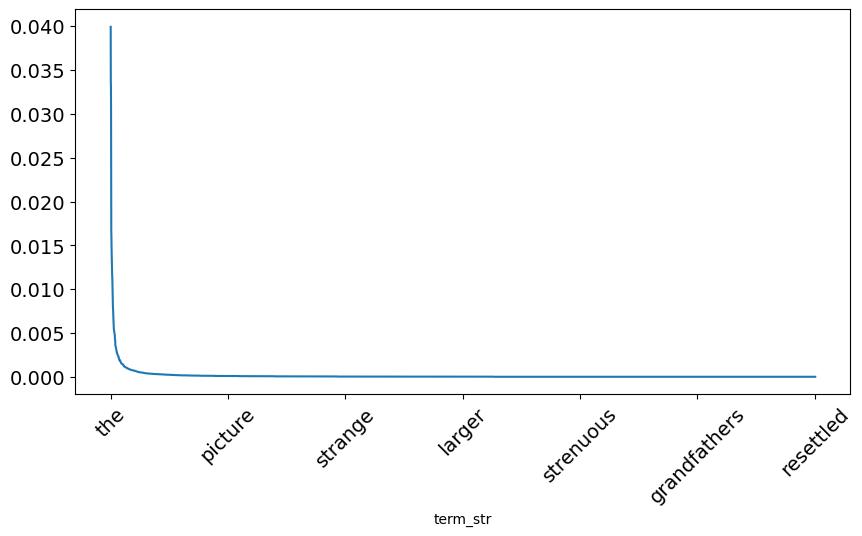

In [41]:
V.p.plot(figsize=(10,5), fontsize=14, rot=45, legend=False);

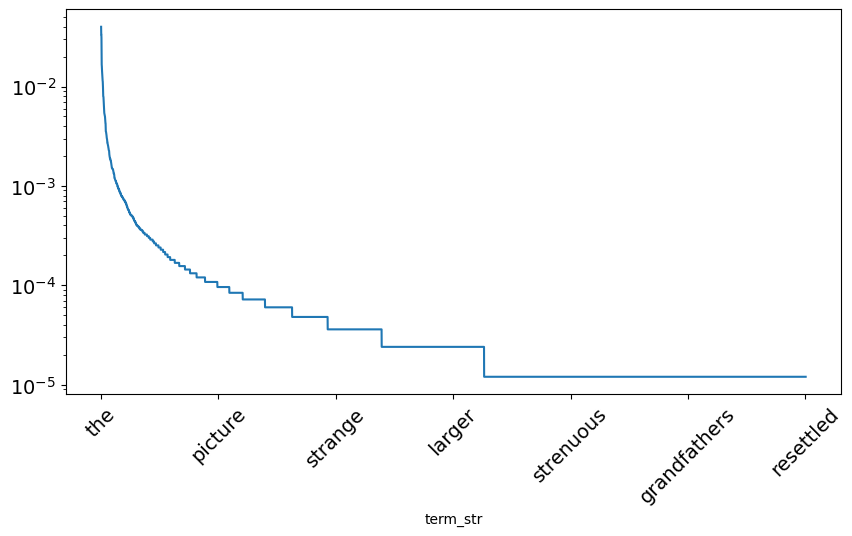

In [42]:
V.p.plot(figsize=(10,5), fontsize=14, rot=45, legend=False, logy=True);

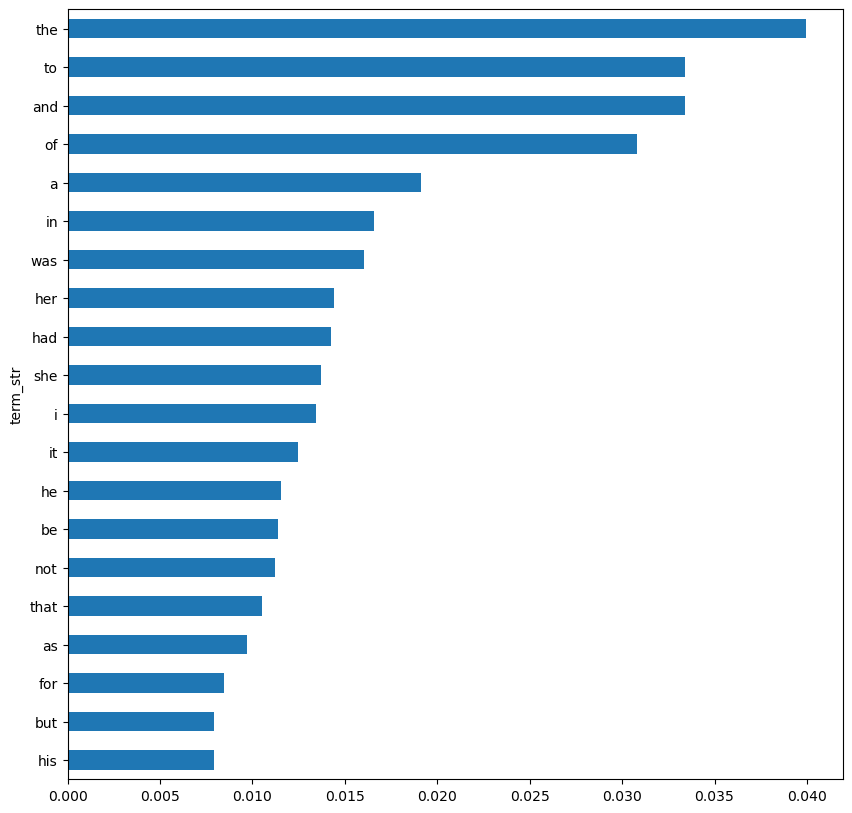

In [43]:
V.p.head(20).sort_values().plot.barh(figsize=(10,10));

## Save Work

In [44]:
K.to_csv(f"{output_dir}/M01-ff-TOKENS.csv")
V.to_csv(f"{output_dir}/M01-ff-VOCAB.csv")

## The The

Why is "the" the most frequent word?

Consider that "the" is "[The Most Powerful Word in the English Language](http://www.bbc.com/culture/story/20200109-is-this-the-most-powerful-word-in-the-english-language)."

> ... ‘the’ lies at the heart of English grammar, having a function rather than a meaning. Words are split into two categories: expressions with a semantic meaning and functional words like ‘the’, ‘to’, ‘for’, with a job to do. ‘The’ can function in multiple ways. This is typical, explains Gary Thoms, assistant professor in linguistics at New York University: “a super high-usage word will often develop a real flexibility”, with different subtle uses that make it hard to define. Helping us understand what is being referred to, ‘the’ makes sense of nouns as a subject or an object. So even someone with a rudimentary grasp of English can tell the difference between ‘I ate an apple’ and ‘I ate the apple’.

Note: function vs. meaning ...

> **Function words are very specific to each language.**<br/><br/>
So, someone who is a native Hindi or Russian speaker is going to have to think very differently when constructing a sentence in English. Murphy says that she has noticed, for instance, that sometimes her Chinese students hedge their bets and include ‘the’ where it is not required. Conversely, Smith describes Russian friends who are so unsure when to use ‘the’ that they sometimes leave a little pause: ‘I went into... bank. I picked up... pen.’ English speakers learning a language with no equivalent of ‘the’ also struggle and might overcompensate by using words like ‘this’ and ‘that’ instead.